In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
 !pip3 install --upgrade pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


###Data Preprocessing

In [ ]:
import pandas as pd
users_df = pd.read_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/users_w_ocr.csv")

In [ ]:
import pickle 

ben_ocr = pd.read_pickle("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/dataframe.pkl")

In [ ]:
ben_ocr["Text"] = ben_ocr["S-COMPANY"] + ben_ocr["S-ADDRESS"]

(array([  6.,   8.,  39., 146.,  95., 102.,  55.,  35.,  11.,   2.]),
 array([ 41. ,  52.4,  63.8,  75.2,  86.6,  98. , 109.4, 120.8, 132.2,
        143.6, 155. ]),
 <a list of 10 Patch objects>)

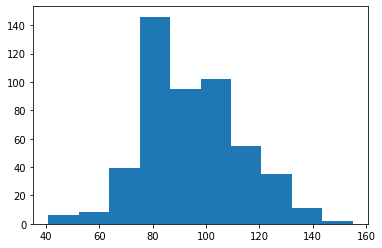

In [ ]:
import matplotlib.pyplot as plt

lens= []
lens2= []
for i in range(len(users_df)):
  lens.append(len(users_df["vendor_name"].iloc[i]) + len(users_df["vendor_address"].iloc[i]))
  lens2.append(len(users_df["Texts"].iloc[i]))
plt.hist(lens)

(array([  3.,   0.,  33., 135., 145.,  83.,  62.,  26.,   7.,   5.]),
 array([  59. ,  189.5,  320. ,  450.5,  581. ,  711.5,  842. ,  972.5,
        1103. , 1233.5, 1364. ]),
 <a list of 10 Patch objects>)

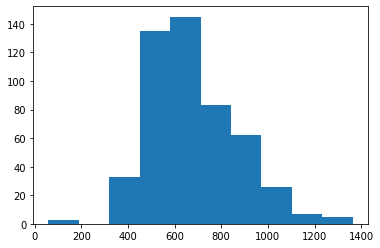

In [ ]:
plt.hist(lens2)

In [ ]:
import re
currtext = users_df.iloc[1]["Texts"]
finding = re.finditer("TOTAL",currtext)

total = []
for currtext in users_df["Texts"]:
  finding = re.finditer("TOTAL",currtext)
  for i in finding: found = i.span()
  words = currtext[found[1]:].split(" ")
  check=True
  for word in words:
    try:
      float(word)
      total.append(float(word))
      check=False
      break
    except ValueError:
      continue
  if check:
    total.append(0)

users_df["Total"] = total

In [ ]:
# for i, row in ben_ocr.iterrows():
#   if not type(row.at["S-DATE"]) is pd.NA:
#     print(row["S-DATE"])


no_na_dates = ben_ocr[ben_ocr['S-TOTAL'].notna()]

for i, row in no_na_dates.iterrows():
  words = row["S-TOTAL"]
  for word in words:
    try:
      float(word)
      users_df.Total[users_df["documentid"] == row["doc_id"]] = float(word)
      break
    except ValueError:
      continue

no_na_text = ben_ocr[ben_ocr['Text'].notna()]

for i, row in no_na_text.iterrows():
  users_df.Texts[users_df["documentid"] == row["doc_id"]] = row["Text"]

<ipython-input-5-616180735945>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df.Total[users_df["documentid"] == row["doc_id"]] = float(word)
<ipython-input-5-616180735945>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df.Texts[users_df["documentid"] == row["doc_id"]] = row["Text"]


In [ ]:
#bert encoder libraries installation
!pip install transformers --quiet
!pip install sentencepiece --quiet
!pip install pytorch-pretrained-bert --quiet

from transformers import BertTokenizer, BertModel
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
import pandas as pd
import numpy as np
import math

bert_uncased_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_uncased_model = BertModel.from_pretrained('bert-base-uncased').to(device).cuda()
bert_uncased_model.eval()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.1 MB/s eta 0:00:00


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
users = pd.read_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/users_w_ocr.csv")

ids = users["documentid"]

import re
currtext = users.iloc[1]["Texts"]
finding = re.finditer("TOTAL",currtext)

total = []
for currtext in users["Texts"]:
  finding = re.finditer("TOTAL",currtext)
  for i in finding: found = i.span()
  words = currtext[found[1]:].split(" ")
  check=True
  for word in words:
    try:
      float(word)
      total.append(float(word))
      check=False
      break
    except ValueError:
      continue
  if check:
    total.append(0)

users["Total"] = total

users_test = users.iloc[math.floor(len(users)*0.9):].copy()
users_val = users.iloc[math.floor(len(users)*0.8):math.floor(len(users)*0.9)].copy()
users_train = users.iloc[:math.floor(len(users)*0.8)].copy()

############################

users["Texts"] = users.Texts.str.replace('[^\ a-zA-Z0-9]', '')
users["Texts"] = users["Texts"].apply(str.lower)
users["vendor_name"] = users.vendor_name.str.replace('[^\ a-zA-Z0-9]', '')
users["vendor_name"] = users["vendor_name"].apply(str.lower)

users["vendor_address"] = users.vendor_address.str.replace('[^\ a-zA-Z0-9]', '')
users["vendor_address"] = users["vendor_address"].apply(str.lower)

users[["year", "month", "day"]] = users['date'].str.split(r'-', expand=True)
users["vendor"] = users["vendor_name"] + " " + users["vendor_address"]
users.drop(["date","Unnamed: 0", "documentid","paymentid","vendor_name","vendor_address"],axis=1,inplace=True)

text_embeddings = []

for text in users.Texts:
  tokenized_text = bert_uncased_tokenizer(text, padding=True, return_tensors="pt") 
  text_encodings_unprocessed = bert_uncased_model(**tokenized_text.to(device="cuda"))
  embedding = np.mean(np.array(text_encodings_unprocessed.last_hidden_state.detach().squeeze().cpu()),axis=0)
  text_embeddings.append(embedding)

text_embeddings = np.column_stack(((users["Total"]),np.array(text_embeddings)))
users.drop(["Total"], axis=1,inplace=True)

vendor_embeddings = []

for text in users.vendor:
  tokenized_text = bert_uncased_tokenizer(text, padding=True, return_tensors="pt") 
  text_encodings_unprocessed = bert_uncased_model(**tokenized_text.to(device="cuda"))
  embedding = np.mean(np.array(text_encodings_unprocessed.last_hidden_state.detach().squeeze().cpu()),axis=0)
  vendor_embeddings.append(embedding)

users.drop(["vendor","Texts"],axis=1,inplace=True)
vendor_entry_features = np.column_stack((np.array(users), np.array(vendor_embeddings)))
vendor_embeddings = vendor_entry_features

######################################
users_test=[]
users_test.append(np.array(vendor_embeddings[math.floor(len(users)*0.9):,:].copy()))
users_test.append(np.array(text_embeddings[math.floor(len(users)*0.9):,:].copy()))

users_val =[]
users_val.append(np.array(vendor_embeddings[math.floor(len(users)*0.8):math.floor(len(users)*0.9),:].copy()))
users_val.append(np.array(text_embeddings[math.floor(len(users)*0.8):math.floor(len(users)*0.9),:].copy()))

users_train = []
users_train.append(np.array(vendor_embeddings[:math.floor(len(users)*0.8),:].copy()))
users_train.append(np.array(text_embeddings[:math.floor(len(users)*0.8),:].copy()))

<ipython-input-7-1879753e6928>:34: FutureWarning: The default value of regex will change from True to False in a future version.
  users["Texts"] = users.Texts.str.replace('[^\ a-zA-Z0-9]', '')
<ipython-input-7-1879753e6928>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  users["vendor_name"] = users.vendor_name.str.replace('[^\ a-zA-Z0-9]', '')
<ipython-input-7-1879753e6928>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  users["vendor_address"] = users.vendor_address.str.replace('[^\ a-zA-Z0-9]', '')


In [ ]:
import torch.utils.data
import torchvision.transforms as transforms

class BillData(torch.utils.data.Dataset):

  # Initialize the class e.g. load files, preprocess, etc.
  def __init__(self, receipt,vendor,labels, transform = None):
    
    self.data = np.array(receipt).astype(np.float64)
    self.vendor = np.array(vendor).astype(np.float64)
    self.labels = np.arange(len(labels))
    self.transform = transforms.ToTensor()

  # Return a sample (x, y) as a tuple e.g. (image, label)
  def __getitem__(self, index):  

    return np.squeeze(self.transform(np.expand_dims(self.data[index],axis=0))), np.squeeze(self.transform(np.expand_dims(self.vendor[index],axis=0))), self.labels[index]
  
  # Return the total number of samples.
  def __len__(self):
    return len(self.data)

In [ ]:
trainset = BillData(users_train[1],users_train[0], ids[:math.floor(len(users)*0.8)])

train_loader = torch.utils.data.DataLoader(trainset, 
                                           batch_size = 20, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 2)

valset = BillData(users_val[1],users_val[0], ids[math.floor(len(users)*0.8):math.floor(len(users)*0.9)])

val_loader = torch.utils.data.DataLoader(valset, 
                                           batch_size = 20, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 2)

testset = BillData(users_test[1],users_test[0], ids[math.floor(len(users)*0.9):])

test_loader = torch.utils.data.DataLoader(testset, 
                                           batch_size = 20, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 2)

###Exploring Images

In [ ]:
from PIL import Image
import pandas as pd
import csv
import cv2
path_ocr = "/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/ocr/"
path_img = "/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/img/"
y = []
x = []

smaller_images = []
for i in users_df.documentid:

    try:
      curr_csv = pd.read_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/ocr/" + i + ".csv", names = ["x1","y1","x2","y2","x3","y3",                        
                                                                                                "x4","y4","text1","text2","text3","text4","text5","text6","text7"],quoting=csv.QUOTE_NONE)
      im = Image.open(path_img+i+".jpg")
      im=np.array(im)
      smaller_images.append(cv2.resize(im[np.min(curr_csv["y1"]):np.max(curr_csv["y4"]),np.min(curr_csv["x1"]):np.max(curr_csv["x2"])],(224,224)) / np.max(im))
    except FileNotFoundError:
      im = Image.open(path_img+i+".jpg")
      im=np.array(im)
      smaller_images.append(cv2.resize(im,(224,224))/np.max(im))
  

KeyboardInterrupt: ignored

In [ ]:
imgs_df = pd.DataFrame({"documentid":smaller_images.keys(),"img":smaller_images.values()})
imgs_df.to_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/preprocessed_images.csv")

(array([384., 167.,   2.,   0.,   3.,   0.,   0.,   0.,   0.,  81.]),
 array([ 436. ,  888.5, 1341. , 1793.5, 2246. , 2698.5, 3151. , 3603.5,
        4056. , 4508.5, 4961. ]),
 <a list of 10 Patch objects>)

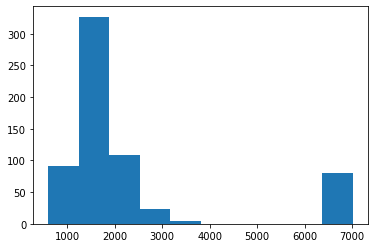

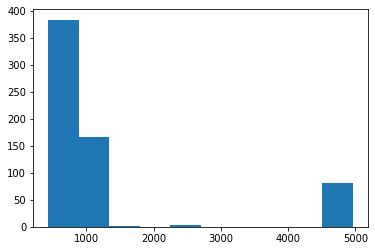

In [ ]:
plt.figure()
plt.hist(y)

plt.figure()
plt.hist(x)

In [ ]:
import torch.utils.data
import torchvision.transforms as transforms

class BillData2(torch.utils.data.Dataset):

  # Initialize the class e.g. load files, preprocess, etc.
  def __init__(self, receipt,vendor,labels, transform = None):
    
    self.data = receipt
    self.image_lists = receipt
    self.vendor = np.array(vendor).astype(np.float64)
    self.labels = np.arange(len(labels))
    self.transform = transforms.ToTensor()

  # Return a sample (x, y) as a tuple e.g. (image, label)
  def __getitem__(self, index):  
    curr_image = self.image_lists[index]
    return curr_image, np.squeeze(self.transform(np.expand_dims(self.vendor[index],axis=0))), self.labels[index]
  
  # Return the total number of samples.
  def __len__(self):
    return len(self.data)

In [ ]:
trainset = BillData2(smaller_images[:math.floor(len(users)*0.8)],users_train[0], ids[:math.floor(len(users)*0.8)])

train_loader2 = torch.utils.data.DataLoader(trainset, 
                                           batch_size = 20, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 2)

valset = BillData2(smaller_images[math.floor(len(users)*0.8):math.floor(len(users)*0.9)],users_val[0], ids[math.floor(len(users)*0.8):math.floor(len(users)*0.9)])

val_loader2 = torch.utils.data.DataLoader(valset, 
                                           batch_size = 20, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 2)

testset = BillData2(smaller_images[math.floor(len(users)*0.9):],users_test[0], ids[math.floor(len(users)*0.9):])

test_loader2 = torch.utils.data.DataLoader(testset, 
                                           batch_size = 20, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 2)

In [ ]:
len(users_train[0])

399

In [ ]:
for (x,y,z) in train_loader2:
  print(np.shape(x))
  print(np.shape(y))
  print(z)

torch.Size([20, 224, 224, 3])
torch.Size([20, 772])
tensor([241,  72,   7, 323, 181, 386,  15, 183, 268, 277, 159,  18,  79, 106,
        222,  86, 270, 322,   0,  39])
torch.Size([20, 224, 224, 3])
torch.Size([20, 772])
tensor([ 66, 317, 155, 184,  20, 352, 206, 280, 100, 392, 175, 385, 373, 168,
         77, 151, 382,  69, 292,  44])
torch.Size([20, 224, 224, 3])
torch.Size([20, 772])
tensor([356, 334, 332,  83, 251,  32, 147, 325, 337, 327, 363, 303, 116, 145,
        205,  53,  19,  24,  89, 239])
torch.Size([20, 224, 224, 3])
torch.Size([20, 772])
tensor([119, 189, 133,  63,  52, 231, 163, 285,  10, 328, 320, 158, 394,  73,
        178, 293, 305, 140, 326, 152])
torch.Size([20, 224, 224, 3])
torch.Size([20, 772])
tensor([348, 120, 272,  97, 230, 257, 138, 128, 209,   1, 365, 164, 345, 350,
         76, 142, 333, 397, 153, 359])
torch.Size([20, 224, 224, 3])
torch.Size([20, 772])
tensor([250, 286, 247, 377, 192, 207, 188, 221, 259, 391, 110, 226,  14, 235,
        306, 300, 310, 27

RuntimeError: ignored

###Neural Network Architecture

##OCR Modelling

In [ ]:
class BillEncoder(torch.nn.Module):
    def __init__(self):
        super(BillEncoder, self).__init__()
        self.conv1r = torch.nn.Conv1d(in_channels = 1, out_channels = 5, kernel_size = 5)
        self.conv2r = torch.nn.Conv1d(in_channels = 5, out_channels = 9, kernel_size = 5)
        self.linear1r = torch.nn.Linear(in_features = 747, out_features = 256)
        self.linear2r = torch.nn.Linear(in_features = 256, out_features = 10)
        self.linear3r = torch.nn.Linear(in_features = 10, out_features = 3)

        self.conv1v = torch.nn.Conv1d(in_channels = 1, out_channels = 5, kernel_size = 5)
        self.conv2v = torch.nn.Conv1d(in_channels = 5, out_channels = 9, kernel_size = 5)
        self.linear1v = torch.nn.Linear(in_features = 756, out_features = 256)
        self.linear2v = torch.nn.Linear(in_features = 256, out_features = 10)
        self.linear3v = torch.nn.Linear(in_features = 10, out_features = 3)

    def rencoder(self, x):
        dropping = torch.nn.Dropout(p = 0.7)     

        # First conv layer + maxpool2d + relu.
        x = self.conv1r(x)
        x = torch.nn.functional.max_pool1d(x, 3)
        x = torch.nn.functional.relu(x)
        
        # Second conv layer + maxpool2d + relu.
        x = self.conv2r(x)
        x = torch.nn.functional.max_pool1d(x, 3)
        x = torch.nn.functional.relu(x)

        # Vectorize except along the batch dimension.
        # You can always print here x.shape to see what it looks like.
        x = x.view(x.size(0), -1)

        # Pass through linear layers.
        x = self.linear1r(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2r(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)

        x = self.linear3r(x)
        return x
    def vencoder(self, x):
        dropping = torch.nn.Dropout(p = 0.7)  

        # First conv layer + maxpool2d + relu.
        x = self.conv1v(x)
        x = torch.nn.functional.max_pool1d(x, 3)
        x = torch.nn.functional.relu(x)
        
        # Second conv layer + maxpool2d + relu.
        x = self.conv2v(x)
        x = torch.nn.functional.max_pool1d(x, 3)
        x = torch.nn.functional.relu(x)

        # Vectorize except along the batch dimension.
        # You can always print here x.shape to see what it looks like.
        x = x.view(x.size(0), -1)

        # Pass through linear layers.
        x = self.linear1v(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2v(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        
        x = self.linear3v(x)
        return x

# Test your model!
# Create dummy batch with 24 samples, where each is an image of size 3x48x48.
dummy_batch = torch.zeros(24,1, 772)
my_model = BillEncoder()
predictions = my_model.vencoder(dummy_batch)

# Seems like working to me.
print(dummy_batch.shape, predictions.shape)

torch.Size([24, 1, 772]) torch.Size([24, 3])


##Image Modelling

In [ ]:
import torch
class BillEncoderV(torch.nn.Module):
    def __init__(self):
        super(BillEncoderV, self).__init__()
        self.conv1r = torch.nn.Conv2d(in_channels = 3, out_channels = 5, kernel_size = 3, stride = 2)
        self.conv2r = torch.nn.Conv2d(in_channels = 5, out_channels = 7, kernel_size = 3, stride = 2)
        self.linear1r = torch.nn.Linear(in_features = 7*169, out_features = 256)
        self.linear2r = torch.nn.Linear(in_features = 256, out_features = 10)
        self.linear3r = torch.nn.Linear(in_features = 10, out_features = 3)

        self.conv1v = torch.nn.Conv1d(in_channels = 1, out_channels = 5, kernel_size = 5)
        self.conv2v = torch.nn.Conv1d(in_channels = 5, out_channels = 9, kernel_size = 5)
        self.linear1v = torch.nn.Linear(in_features = 504, out_features = 256)
        self.linear2v = torch.nn.Linear(in_features = 256, out_features = 10)
        self.linear3v = torch.nn.Linear(in_features = 10, out_features = 3)
    def rencoder(self, x):
        dropping = torch.nn.Dropout(p = 0.7)     

        # First conv layer + maxpool2d + relu.
        x = self.conv1r(x)
        x = torch.nn.functional.max_pool2d(x, (2,2))
        x = torch.nn.functional.relu(x)
        
        # Second conv layer + maxpool2d + relu.
        x = self.conv2r(x)
        x = torch.nn.functional.max_pool2d(x, (2, 2))
        x = dropping(x)
        x = torch.nn.functional.relu(x)

        # Vectorize except along the batch dimension.
        # You can always print here x.shape to see what it looks like.
        x = x.view(x.size(0), -1)

        # Pass through linear layers.
        x = self.linear1r(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2r(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        
        x = self.linear3v(x)
        return x
    def vencoder(self, x):
        dropping = torch.nn.Dropout(p = 0.7)  

        # First conv layer + maxpool2d + relu.
        x = self.conv1v(x)
        x = torch.nn.functional.max_pool1d(x, 3)
        x = torch.nn.functional.relu(x)
        
        # Second conv layer + maxpool2d + relu.
        x = self.conv2v(x)
        x = torch.nn.functional.max_pool1(x, 3)
        x = torch.nn.functional.relu(x)

        # Vectorize except along the batch dimension.
        # You can always print here x.shape to see what it looks like.
        x = x.view(x.size(0), -1)

        # Pass through linear layers.
        x = self.linear1v(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        
        x = self.linear2v(x)
        x = dropping(x)
        x = torch.nn.functional.relu(x)
        
        x = self.linear3v(x)
        return x

# Test your model!
# Create dummy batch with 24 samples, where each is an image of size 3x48x48.
dummy_batch = torch.zeros(24,3,224,224)
my_model = BillEncoderV()
predictions = my_model.rencoder(dummy_batch)

# Seems like working to me.
print(dummy_batch.shape, predictions.shape)

torch.Size([24, 3, 224, 224]) torch.Size([24, 3])


In [ ]:
# !pip install livelossplot --quiet
from livelossplot import PlotLosses

# Defining as global the device to use (by default CPU).
device = torch.device("cuda")

def top5_accuracy(rencoded, vencoded, labels):
    vencoded = vencoded.cpu().detach()
    rencoded = rencoded.cpu().detach()
    labels = labels.cpu().detach()
    counter = 0
    
    for i in range(np.shape(rencoded)[0]):      
      distances = np.dot(vencoded,rencoded[i,:])
      top_five = labels[np.argpartition(distances,5)[:5]]
      #print(top_five,labels[i])
      if labels[i] in top_five:
        counter+=1
    
    return counter

def cost_function(rencoded, vencoded):
  # vencoded = vencoded.cpu().detach()
  # rencoded = rencoded.cpu().detach()
  
  denom1 = torch.sum(torch.sqrt(torch.sum(rencoded*rencoded,dim=1)))
  denom2 = torch.sum(torch.sqrt(torch.sum(vencoded*vencoded,dim=1)))

  denom = denom1*denom2
  pos_distances =torch.sum(torch.abs(torch.sum(rencoded*vencoded, dim=1))/ denom) 
  
  rencoded2 = torch.vstack((rencoded[5:,:],rencoded[:5,:]))
  vencoded2 = torch.vstack((vencoded[5:,:],vencoded[:5,:]))
  neg_distances = torch.sum(torch.abs(torch.reciprocal(torch.sum((rencoded2*vencoded2), dim=1)/denom)))


  return torch.abs(vencoded-rencoded)

# def cost_function(rencoded,vencoded):
  
#   pos_distances = torch.sum(torch.sqrt(torch.sum((rencoded - vencoded) * (rencoded - vencoded),dim=1)))
#   rencoded2 = torch.vstack((rencoded[5:,:],rencoded[:5,:]))
#   vencoded2 = torch.vstack((vencoded[5:,:],vencoded[:5,:]))
#   neg_distances = torch.sum(torch.reciprocal(torch.sqrt(torch.sum((rencoded - vencoded) * (rencoded - vencoded),dim=1))))

#   return neg_distances+pos_distances

def train_model(batch_size, 
                n_epochs, 
                learningRate, 
                model,
                cost_function, 
                optimizer,
                scheduler,
                train_loader,
                val_loader):

  # Move the model and cost function to GPU (if needed).
  model = model.cuda()
  # cost_function = cost_function.to(device)

  # Keep track of best accuracy so far.
  best_accuracy = 0 
  liveloss = PlotLosses()

  # Main for loop of SGD.
  for epoch in range(0, n_epochs):
    logs = {}

    # initialize control variables.
    correct = 0
    cumulative_loss = 0
    n_samples = 0

    # Set the model in training mode.
    model.train()

    # Sample a batch on each iteration.
    for (batch_id, (receipt, vendor, labels)) in enumerate(train_loader):
      model.zero_grad()
      labels = torch.tensor(labels).cuda()
      # Move (x,y) data to GPU (if so desired).
      receipt = receipt.type(torch.cuda.FloatTensor).requires_grad_(True).to(device)
      vendor = vendor.type(torch.cuda.FloatTensor).requires_grad_(True).to(device)
      model = model.cuda()
      # Compute predictions.
      rencoded = model.rencoder(torch.unsqueeze(receipt.requires_grad_(True),dim=1).cuda())
      vencoded = model.vencoder(torch.unsqueeze(vendor.requires_grad_(True),dim=1).cuda())
      # print(xb.shape, yb.shape, predicted.shape)

      loss = cost_function(rencoded.cuda(), vencoded.cuda())

      # Compute loss.
      cumulative_loss += loss.item()
      correct += top5_accuracy(rencoded.cuda(), vencoded.cuda(),labels)
      n_samples += len(labels)
      
      """
      # Count how many correct in batch.
      predicted_ = predicted.detach().softmax(dim = 1)
      max_vals, max_ids = predicted_.max(dim = 1)
      correct += (max_ids == yb).sum().cpu().item()
      n_samples += xb.size(0)
      """

      # Compute gradients (autograd).
      loss.backward()
      
      # Run one basic training step of SGD.
      optimizer.step()

      # Keep track of loss and accuracy for the plot.
      n_batches = 1 + batch_id 
      logs['loss'] = cumulative_loss / n_batches
      logs['accuracy'] = correct / n_samples
    
    # initialize control variables.
    correct = 0
    cumulative_loss = 0
    n_samples = 0

    # Set the model in evaluation mode.
    model.eval()

    # No need to keep track of gradients for this part.
    with torch.no_grad():
      # Run the model on the validation set to keep track of accuracy there.
      
      for (batch_id, (receipt, vendor, labels)) in enumerate(val_loader):
        
        model.zero_grad()
        labels = torch.tensor(labels).cuda()
        # Move (x,y) data to GPU (if so desired).
        receipt = receipt.type(torch.cuda.FloatTensor).requires_grad_(True).to(device)
        vendor = vendor.type(torch.cuda.FloatTensor).requires_grad_(True).to(device)
        model = model.cuda()
        # Compute predictions.
        rencoded = model.rencoder(torch.unsqueeze(receipt.requires_grad_(True),dim=1).cuda())
        vencoded = model.vencoder(torch.unsqueeze(vendor.requires_grad_(True),dim=1).cuda())
        # print(xb.shape, yb.shape, predicted.shape)

        loss = cost_function(rencoded, vencoded)

        # Compute loss.
        cumulative_loss += loss.item()
        correct += top5_accuracy(rencoded.cuda(), vencoded.cuda(),labels)
        n_samples += len(labels)

        """
        # Count how many correct in batch.
        predicted_ = predicted.detach().softmax(dim = 1)
        max_vals, max_ids = predicted_.max(dim = 1)
        correct += (max_ids == yb).sum().cpu().item()
        n_samples += xb.size(0)
        """

        # Keep track of loss and accuracy for the plot.
        n_batches = 1 + batch_id 
        logs['val_loss'] = cumulative_loss / n_batches
        logs['val_accuracy'] = correct / n_samples

    # Save the parameters for the best accuracy on the validation set so far.
    if logs['val_accuracy'] > best_accuracy:
        best_accuracy = logs['val_accuracy']
        torch.save(model.state_dict(), 'best_model_so_far.pth')

    # Update the plot with new logging information.
    liveloss.update(logs)
    liveloss.send()

    # What is this for? Please look it up.
    if scheduler != -1:
        scheduler.step()

  # Load the model parameters for the one that achieved the best val accuracy.
  # model.load_state_dict(torch.load('best_model_so_far.pth'))    

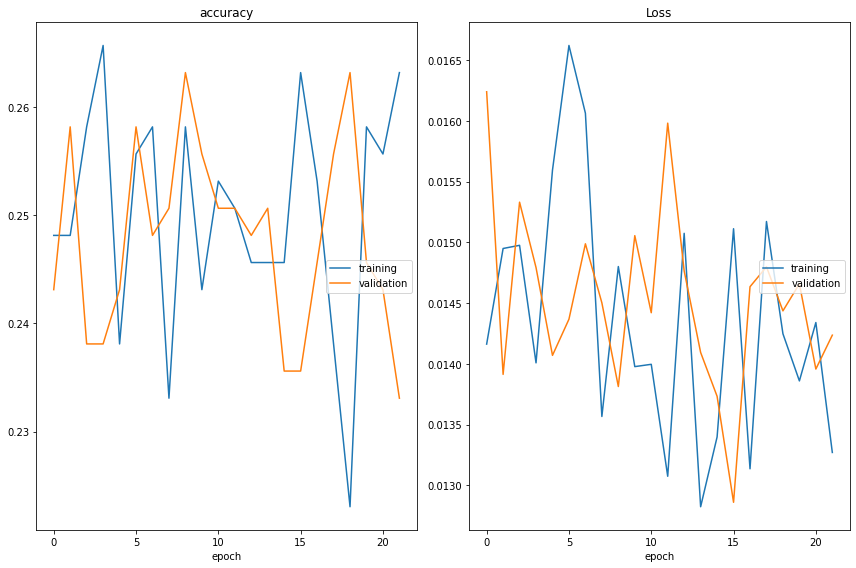

accuracy
	training         	 (min:    0.223, max:    0.266, cur:    0.263)
	validation       	 (min:    0.233, max:    0.263, cur:    0.233)
Loss
	training         	 (min:    0.013, max:    0.017, cur:    0.013)
	validation       	 (min:    0.013, max:    0.016, cur:    0.014)


Exception in thread Thread-263:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/_utils/pin_memory.py", line 49, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/_utils/pin_memory.py", line 26, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.8/dist-packages/torch/multiprocessing/reductions.py", line 305, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.8/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.8/multiprocessing/resourc

KeyboardInterrupt: ignored

In [ ]:
learningRate = 1e-6

model = BillEncoder()

optimizer = torch.optim.Adam(model.parameters(), lr = learningRate,weight_decay=1e-5)

train_model(80, 60,  learningRate, model, cost_function, optimizer, -1, 
            train_loader, train_loader);